# Production Model - Basic Linear Regression Model

| Model Features | --- | --- | 
| --- | --- |--- | 
| **Numeric** | --- |--- | 
| Lot Area | Overall Qual | Garage Area | 
| Total Bathrooms | Total SF | Year Remod/Add |
| --- | --- |--- | 
| **Catagorical** | --- | --- | 
| MS SubClass | Neighborhood | Condition 1 | 
| Exter Qual | Kitchen Qual | --- |

In [1]:
#importing libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
#import re

# Data Dictionary - [Link](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) 

In [2]:
#importing complete training data
housing_data = pd.read_csv("datasets/complete_training_data.csv")
#importing testing data
testing_data = pd.read_csv("datasets/complete_kaggle_test.csv")

In [3]:
ms_subclass_dummies = pd.get_dummies(housing_data["MS SubClass"],prefix="SubClass")
ms_subclass_dummies.drop(columns=["SubClass_150","SubClass_40"],inplace=True)

neighborhood_dummies = pd.get_dummies(housing_data["Neighborhood"])
neighborhood_dummies.drop(columns=["Landmrk","GrnHill","Greens","Blueste"],inplace=True)

condition_1_dummies = pd.get_dummies(housing_data["Condition 1"])
condition_1_dummies.drop(columns=["RRNe","RRNn"],inplace=True)

exter_qual_dummies = pd.get_dummies(housing_data["Exter Qual"],prefix="ExQ")
exter_qual_dummies.drop(columns="ExQ_Fa",inplace=True)

kitchen_qual_dummies = pd.get_dummies(housing_data["Kitchen Qual"],prefix="Kit")
kitchen_qual_dummies.drop(columns="Kit_Fa",inplace=True)

In [4]:
xvars = ["Lot Area","Overall Qual","Total SF","Garage Area","Year Remod/Add","Total Bathrooms"]

In [5]:
X = housing_data[xvars]
y = housing_data["SalePrice"]

In [6]:
#creating matrix for xvars and dummy cells
X = pd.concat([X,
ms_subclass_dummies,
neighborhood_dummies,
condition_1_dummies,
exter_qual_dummies,
kitchen_qual_dummies
              ], axis=1)

In [7]:
#spliting the data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2020)

In [8]:
linreg = LinearRegression()

In [9]:
linreg.fit(X_train,y_train)

LinearRegression()

In [10]:
#looking at 5 part cross validation on traing data. The R2 is quite good at 0.90
linreg_scores = cross_val_score(linreg, X_train, y_train, cv=5)
linreg_scores.mean()

0.8942456407020198

In [11]:
display(linreg.score(X_train,y_train))
display(linreg.score(X_test,y_test))

0.9035268020422202

0.8733556023526714

In [12]:
X_train_sm = X_train
X_train_sm = sm.add_constant(X_train_sm)
y_train_sm = y_train

In [13]:
sm_model = sm.OLS(y_train_sm,X_train_sm).fit()

In [14]:
results_summary = sm_model.summary()

In [15]:
results_summary.tables[0]

Dep. Variable:,SalePrice,R-squared:,0.904
Model:,OLS,Adj. R-squared:,0.900
Method:,Least Squares,F-statistic:,256.3
Date:,"Sun, 16 Aug 2020",Prob (F-statistic):,0.00
Time:,18:11:15,Log-Likelihood:,-18666.
No. Observations:,1618,AIC:,3.745e+04
Df Residuals:,1560,BIC:,3.776e+04
Df Model:,57,,
Covariance Type:,nonrobust,,


In [16]:
results_as_html = results_summary.tables[1].as_html()
coef = pd.read_html(results_as_html, header=0, index_col=0)[0]

In [17]:
coef.head(7)

,coef,std err,t,P>|t|,[0.025,0.975]
const,-525000.0000,94900.000,-5.532,0.0,-711000.000,-339000.000
Lot Area,2.0051,0.251,7.975,0.0,1.512,2.498
Overall Qual,10660.0000,912.395,11.679,0.0,8866.490,12400.000
Total SF,32.3825,1.483,21.839,0.0,29.474,35.291
Garage Area,23.8789,4.282,5.577,0.0,15.480,32.278
Year Remod/Add,248.5279,47.493,5.233,0.0,155.371,341.685
Total Bathrooms,10930.0000,1193.071,9.160,0.0,8588.231,13300.000


In [18]:
coef_display = coef.head(7).T.drop(columns="const").head(1)

In [19]:
coef_display.rename(index={"coef" : "Dollars increase per"})

,Lot Area,Overall Qual,Total SF,Garage Area,Year Remod/Add,Total Bathrooms
Dollars increase per,2.0051,10660.0,32.3825,23.8789,248.5279,10930.0


Training $R^2$ = 0.904

Testing $R^2$ = 0.873

In [20]:
y_preds = linreg.predict(X)

In [21]:
resids = y - y_preds

In [22]:
#RMSE
mean_squared_error(y,y_preds,squared=False)

24930.57807994913

''

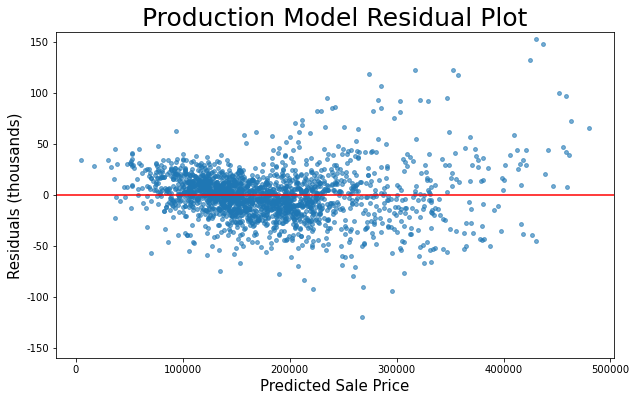

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(linreg.predict(X), resids, s=15, alpha=0.6)
plt.axhline(0, color="red")
plt.title("Production Model Residual Plot",fontsize=25)
plt.xlabel("Predicted Sale Price",fontsize=15)
plt.ylabel("Residuals (thousands)",fontsize=15)
locs, labels = plt.yticks()
plt.ylim(-160000,160000)
plt.yticks(ticks=np.arange(-150000,150001,50000),labels=np.arange(-150,151,50))
;

In [24]:
complete_df = pd.concat([housing_data[xvars],y],axis=1)

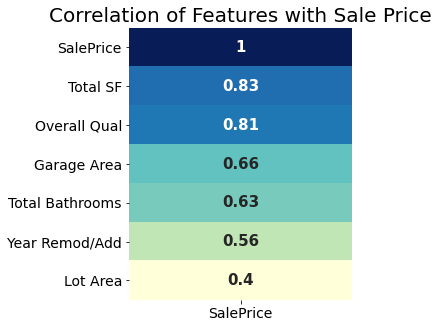

In [25]:
plt.figure(figsize=(4,5))
plt.rc("font",size=14)
plt.title("Correlation of Features with Sale Price",fontsize=20)
sns.heatmap(complete_df.corr()[["SalePrice"]].sort_values(by="SalePrice",ascending=False),
            annot=True,
            cmap='YlGnBu',
            cbar=False,
            annot_kws={'fontsize':15,"weight":"bold"});

### Calculating sales prices in training data (need to output .csv w/ header Id,SalePrice)

In [26]:
X_kaggle = testing_data[xvars]

In [27]:
kaggle_ms_subclass_dummies = pd.get_dummies(testing_data["MS SubClass"],prefix="SubClass")
kaggle_ms_subclass_dummies.drop(columns=["SubClass_40"],inplace=True)

kaggle_neighborhood_dummies = pd.get_dummies(testing_data["Neighborhood"])
kaggle_neighborhood_dummies.drop(columns=["Greens","Blueste"],inplace=True)

kaggle_condition_1_dummies = pd.get_dummies(testing_data["Condition 1"])
kaggle_condition_1_dummies.drop(columns=["RRNe","RRNn"],inplace=True)

kaggle_exter_qual_dummies = pd.get_dummies(testing_data["Exter Qual"],prefix="ExQ")
kaggle_exter_qual_dummies.drop(columns="ExQ_Fa",inplace=True)

kaggle_kitchen_qual_dummies = pd.get_dummies(testing_data["Kitchen Qual"],prefix="Kit")
kaggle_kitchen_qual_dummies.drop(columns=["Kit_Fa","Kit_Po"],inplace=True)

In [28]:
#creating matrix for xvars and dummy cells
X_kaggle = pd.concat([X_kaggle,
kaggle_ms_subclass_dummies,
kaggle_neighborhood_dummies,
kaggle_condition_1_dummies,
kaggle_exter_qual_dummies,
kaggle_kitchen_qual_dummies
              ], axis=1)

In [29]:
#finding differences between train and testing data columns. They need to match for fit to make sense
for i,x in enumerate(X_train.columns):
    if X_kaggle.columns[i] != x:
        print(i,x)
    else:
        pass

In [30]:
price_X_testing = linreg.predict(X_kaggle)
testing_data["SalePrice"] = price_X_testing
testing_data.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Total SF x Garage Area,Overall Qual^2,Year Remod/Add x Total SF,Total SF^2,Overall Qual x Garage Area,Overall Qual x Total Bathrooms,Total SF x Total Bathrooms,Overall Qual x Year Remod/Add,Total Bathrooms x Garage Area,SalePrice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,1297120,36,5748600,8690704,2640,12.0,5896.0,11700,880.0,143588.384352


In [33]:
#not sure why some need to_csv("./") and others need("../")
ols_basic_fit = testing_data[["Id","SalePrice"]]
ols_basic_fit.to_csv("./datasets/ols_production_fit.csv",index=False)